# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---

## Multiple Linear Regression

Multiple linear regression is a type of regression analysis in which there are multiple independent variables that have an effect on the dependent variable. In multiple linear regression, the goal is to find the linear equation that best explains the relationship between the outcome and the features in $X$.

The equation takes the form:

$$y \;=\; \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_{m-1} x_{m-1}$$

where $y$ is the dependent variable, $x_1$, $x_2$, ..., $x_{m-1}$ are the independent variables, and $\theta_0$, $\theta_1$, $\theta_2$, ..., $\theta_{m-1}$ are the coefficients that represent the influence of each variable on the output $y$. The coefficients are estimated using the data, and the resulting equation can be used later to make predictions on new data.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=3)

In [3]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rc('figure', figsize=(6, 4))

from matplotlib import rcParams
rcParams['font.family'] = 'Monospace'
rcParams['font.size'] = 8
rcParams['axes.unicode_minus'] = False

In [4]:
# Show plots in an interactive format, e.g., zooming, saving, etc
# %matplotlib widget

### Importing the dataset

In [5]:
df = pd.read_csv('../datasets/50_Startups.csv')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Extract features $X$ and target $y$ from the dataset. **Profit** is the dependant variable.

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Check the first five observations within $X$

In [10]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [11]:
X = X.values
type(X)

numpy.ndarray

Check the corresponding first five values from **Profit** column.

In [12]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [13]:
y = y.values
type(y)

numpy.ndarray

### Encoding categorical data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


### Splitting the dataset into training set and test set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Training the multiple linear regression model on the training set

In [19]:
from sklearn.linear_model import LinearRegression

This code will create a linear regression model that fits a line to the training data, in order to make future predictions on the test data. 

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
theta = lr.coef_
theta

array([-1.455e+02, -4.153e+02,  5.607e+02,  7.753e-01, -1.645e-02,
        3.627e-02])

In [22]:
b = lr.intercept_
b

np.float64(48661.699896543345)

Consider the sample `tst` as follows:

In [23]:
tst = np.array([1, 0, 0, 15e+3, 10e+2, 5e+6])

Predict the outcome if `tst` is the input.

In [24]:
pred = theta @ tst + b
print('%.3f' % pred)

241495.528


By calling our `lr`, we get the same result:

In [25]:
lr.predict(tst.reshape(1, -1))

array([241495.528])

If we don't want to do the encoding of state feature by ourselves, we can invoke the previous `ct` object.

In [26]:
tst_new = [[15e+3, 10e+2, 5e+6, 'California']]
arr = np.array(ct.transform(tst_new))
arr

array([[1.0, 0.0, 0.0, 15000.0, 1000.0, 5000000.0]], dtype=object)

In [27]:
lr.predict(arr)

array([241495.528])

### Evaluation and Visualization

Make predictions using the $X$ test set and visualize the results

In [28]:
y_pred = lr.predict(X_test)

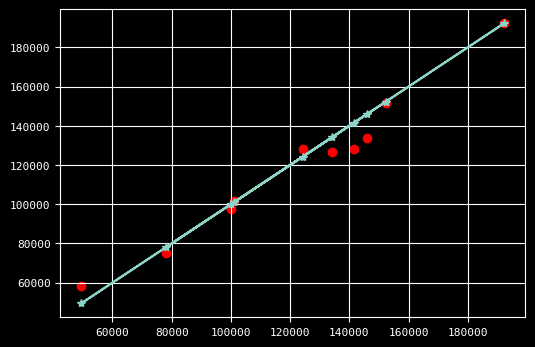

In [29]:
# y_pred vs. y_test
plt.scatter(y_test, y_pred, c='red')
plt.plot(y_test, y_test, '-*')
plt.grid()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) # relative error: *100

In [32]:
mae, mse, mape

(np.float64(5256.526414805619),
 np.float64(50037959.16426007),
 np.float64(0.05142299211193663))

Multiple linear regression can be used to understand the relationship between multiple independent variables and a single dependent variable, and can be used to make predictions about the dependent variable given new data. However, it's important to note that the independent variables must be linearly related to the dependent variable in order for multiple linear regression to behave appropriately. If the relationship is non-linear, we need to use a different type of regression analysis such as polynomial regression.